## Data Science Project

### Downloading the dataset from Kaggle
#### https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
# importing opendatasets library for downloading dataset from online source
import opendatasets as od

In [3]:
# URL of the concerned Kaggle dataset
dataset_url = "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data"

In [4]:
import os        # enables creating and removing directory, fetching its contents
import shutil    # offers high level operations on files and its contents

if os.path.exists('./breast-cancer-wisconsin-data'):
   shutil.rmtree('./breast-cancer-wisconsin-data')  #will delete the entire directory 

In [5]:
# downloading the dataset
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedashreegadekar
Your Kaggle Key: ········


100%|██████████| 48.6k/48.6k [00:00<00:00, 386kB/s]

In [6]:
# mentioning the data directory
data_dir = './breast-cancer-wisconsin-data'

In [7]:
# listing files present in the directory, given dataset includes a CSV file
os.listdir(data_dir)

['data.csv']

### Exploratory Analysis

In [88]:
# importing Python libraries for exploratory analysis
import numpy as np  # enables working with arrays
import pandas as pd # data cleaning and analysis

from IPython.display import display
from pandas import Series, DataFrame
import seaborn as sns  # data visualization and exploratory data analysis
import time # provides a function for getting local time from the number of seconds elapsed since the epoch called localtime() 

import sklearn      # provides tools for classification, regression, clustering and dimensionality reduction
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go  

In [89]:
df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv')
df.head() # returns the first 5 [default] rows from the dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [90]:
# contains NaN in the entire Unnamed column. Thus this column not necessary for analysis.

In [91]:
# finding missing values from the dataset
missing_value = df.isnull()
missing_value

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [92]:
# getting count of the missing values from the dataset for each attribute
missing_value_count = df.isnull().sum()
missing_value_count

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [93]:
# dropping off the attributes with missing values(unnamed) and also dropping id column as not needed for evaluation
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

### Data Analysis

### A. Descriptive statistics

In [94]:
# getting the number of rows and columns of the dataframe
df.shape

(569, 31)

In [95]:
# to return unique values in order of appearance in the dataset as NumPy arrays for a given attribute
df.diagnosis.unique() #for this attribute there are only two unique values ie M (malignant) and B (benign)

array(['M', 'B'], dtype=object)

In [99]:
# calculating statistical parameters of the dataframe(count:no of non empty values, min:minimum value, 25/50/75:percentiles, 
# max:maximum value)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### B. Visual representation of data

In [100]:
# getting summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [101]:
# finding grouped mean values of each attribute for the two groups: malignant and benign
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [102]:
# depicting the percentage of cases classified as  malignant and benign in the dataset
outcome_count = df.diagnosis.value_counts()
outcome_count = pd.Series(outcome_count) # holds data in one dimensional format
outcome_count = pd.DataFrame(outcome_count) # two dimensional labelled data structure
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['diagnosis']/sum(outcome_count['diagnosis']) # calculates float value of percentage
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int') # rounding off to nearest int value

outcome_count

,diagnosis,Percent
Benign,357,63
Malignant,212,37


In [103]:
# boxplot representation of attributes within a specified range of columns
names = df.columns[0:5]
# convert DataFrame to list
values=[] 
for column in df.iloc[:,5:11].columns: # .iloc selects particular cell of the dataset
    li = df[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

In [104]:
# Creating a dataset for finding contribution of individual features towards whether 
# or not a certain cancer is malignant or benign. 

# Map values in diagnosis column, 0 representing benign  and 1 represeting malignant 
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1}) 
data_for_corr = df[['radius_mean', 'perimeter_mean', 'area_mean',
                               'compactness_mean', 'concavity_mean',
                               'concave points_mean', 'diagnosis']]  # mean value columns considered
#Create data_for_corr with various features and diagnosis 
data_for_corr.head() 

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,1


### 1. Pair Plot 

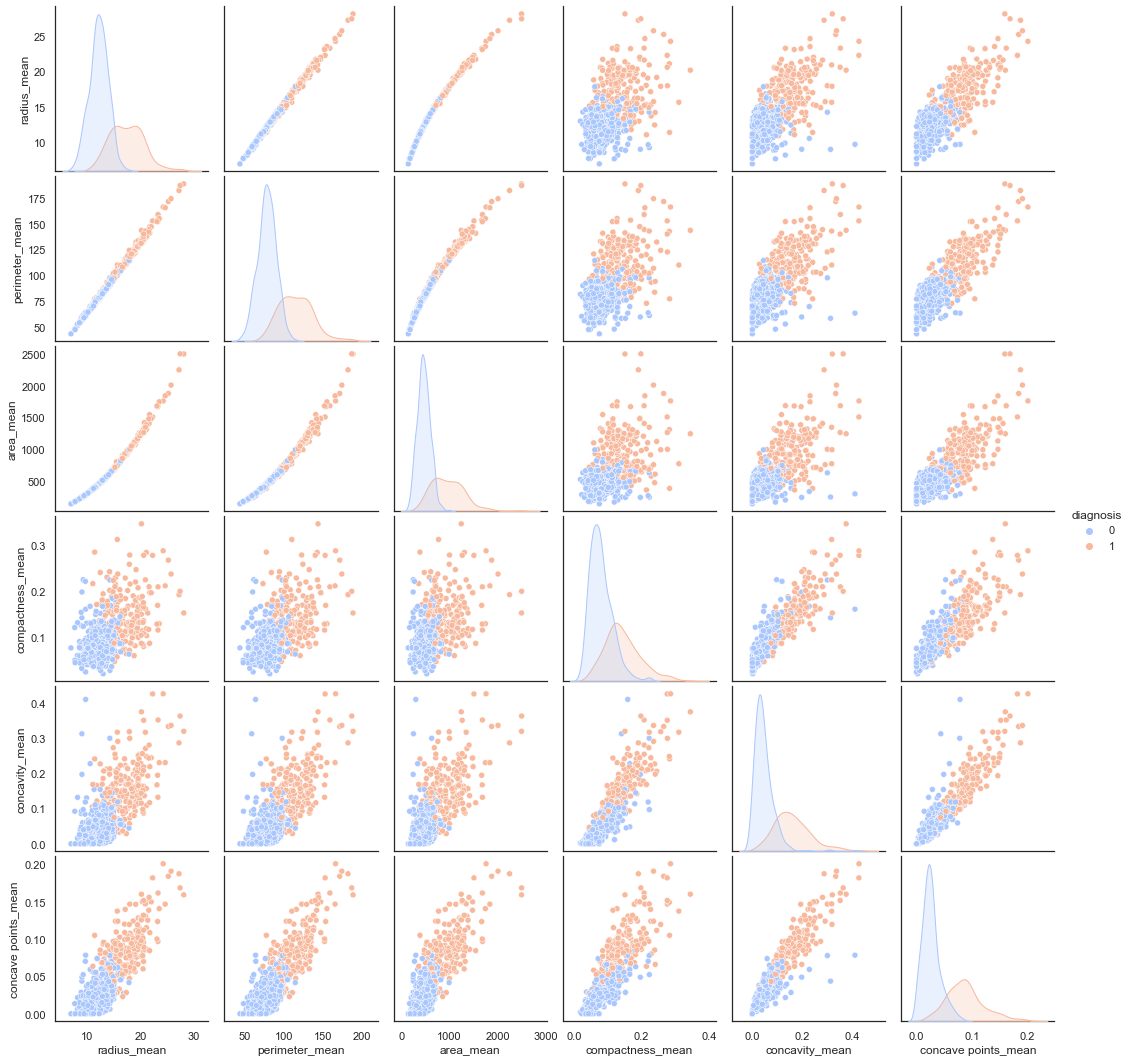

In [105]:
# pairplot to depict relationship between individual features 
sns.pairplot(data_for_corr, palette='coolwarm',hue= 'diagnosis')

* The diagonal elements are universal plots for both classes. The variables are increasing together, thus they show `positive association`.
* The classes can be separated by drawing a linear hyperplaneline. Hence our data is `linear` in nature.

In [106]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [107]:
df.head(-10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
555,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
556,0,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742
557,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969


In [108]:
# data atribute introduced here
# Creating the Target Class
# Storing the Target in y (B or M)  
y_target = df.diagnosis   

# Making a list of unwanted columns 
list = ['diagnosis']

# Dropping the unnecessary Column
data = df.drop(list,axis = 1 ) # Dropping Column `axis = 1`, for rows `axis = 0`  
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Benign:  357
Malignant:  212


C:\Users\vedas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



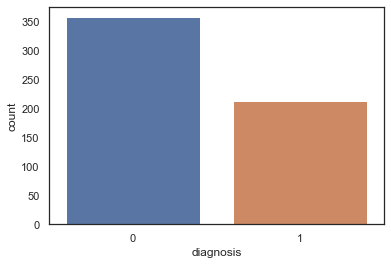

In [109]:
# checking the distribution for Target Varible using seaborn library:
x = sns.countplot(y_target, label="Count") # countplot: tells us the count of each class in column.
B, M = y_target.value_counts() # Using -`value_counts` from the Pandas to store the individual count.
print('Benign: ', B)
print('Malignant: ', M)

The data classes are considerably `balanced`.

In [110]:
# separating target from features
print("Number of Data Points: {}".format(data.shape[0])) 
print("Number of Features/Attributes: {}".format(data.shape[1])) 
print("Features/Attributes:", data.columns) 

Number of Data Points: 569
Number of Features/Attributes: 30
Features/Attributes: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [115]:
"""
Create dataset for finding contribution of individual features towards whether 
or not a certain cancer tumor is malignant or benign. 
"""

# Map values in diagnosis column, 0 representing benign  and 1 represeting malignant 
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1}) 
data_for_corr = data[['radius_mean', 'perimeter_mean', 'area_mean',
                               'compactness_mean', 'concavity_mean',
                               'concave points_mean', 'diagnosis']]
#Create data_for_corr with various features and diagnosis 
data_for_corr.head() 

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,NaN
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,NaN
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,NaN
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,NaN
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,NaN


### 2. Violin plots

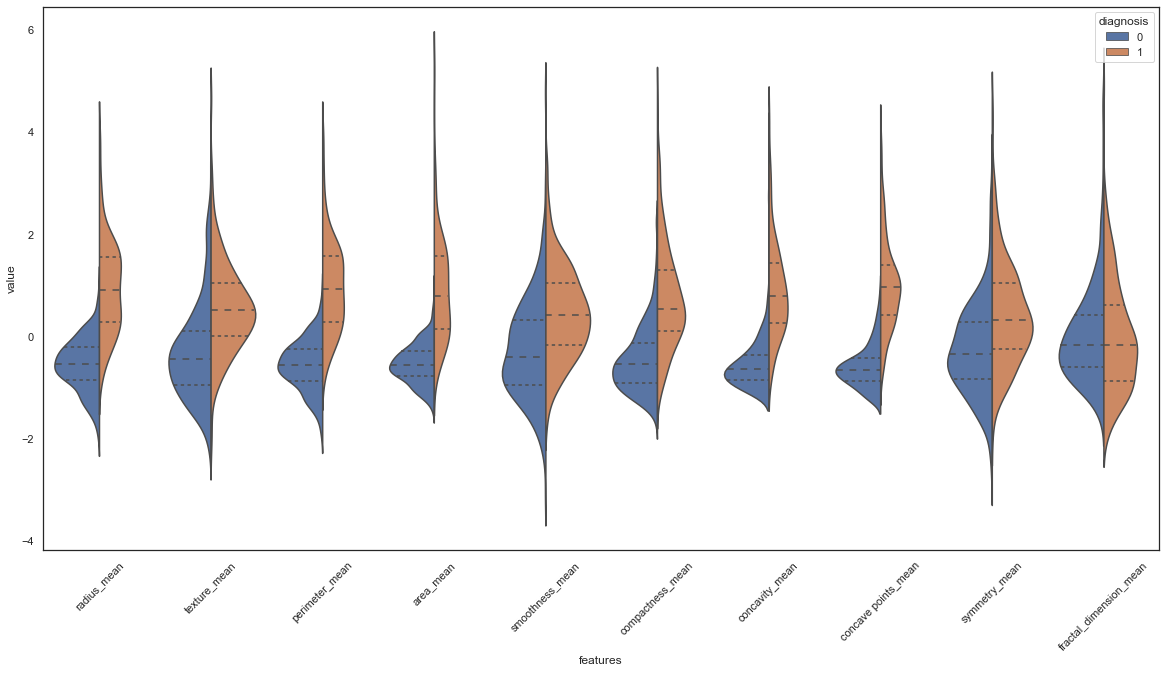

In [116]:
# first ten features
x_features = data
data_n = (data - data.mean()) / (data.std())  # data normalization for plotting

# get all the features -- since axis = 1, Columnwise concatenation
data_vis = pd.concat([y_target, data_n.iloc[:,0:10]], axis=1)

# flattening the dataset
# `pd.melt` -- converting the DataFrame from wide format to long format 
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# --matplotlib--
plt.figure(figsize=(20,10))


# # --seaborn--
sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True, 
               inner = "quart"
               )

plt.xticks(rotation=45); # --matplotlib--

`Interpreting the above violin plot`: in the texture_mean the median value of Malignent & benign are well separated as compared to fractal_dimension_worst where the median of two coincide with each other, meaning this could be a good value feature for classification.

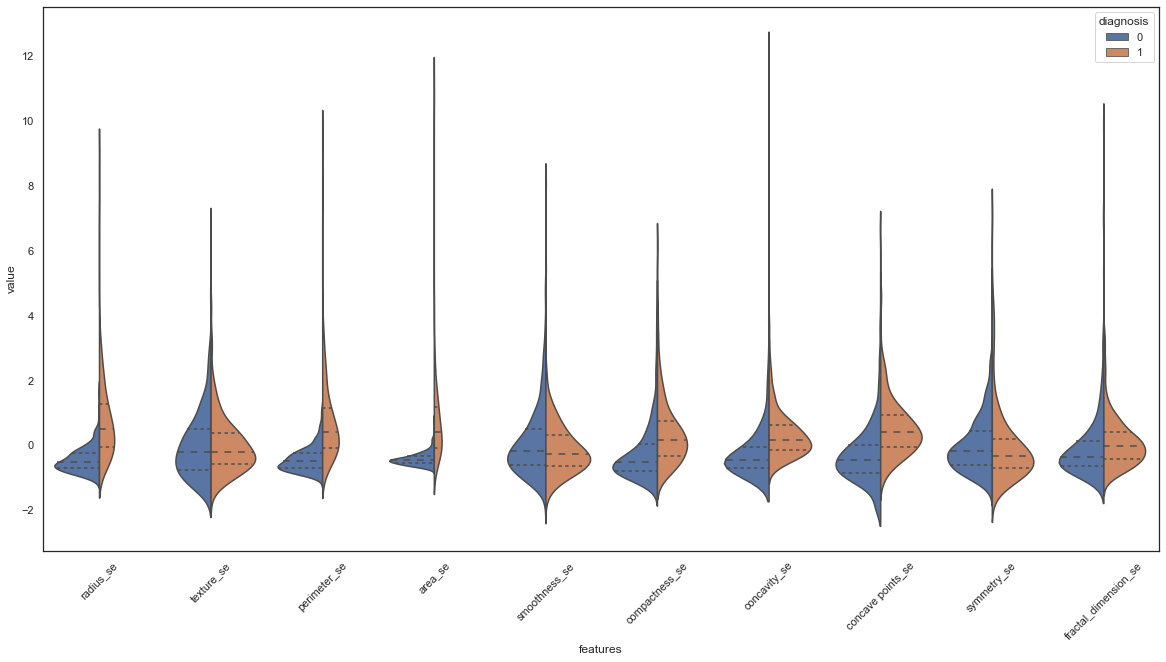

In [117]:
# Second ten features
data_vis = pd.concat([y_target, data_n.iloc[:,10:20]], axis=1)

data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))

sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True, 
               inner = "quart")

plt.xticks(rotation=45); # --matplotlib--


`Interpreting the above violin plot`: The median values of smoothness-se, symmetry_se, texture_se for both classes is not very well separated. Thus these features may not prove useful in effective classification.

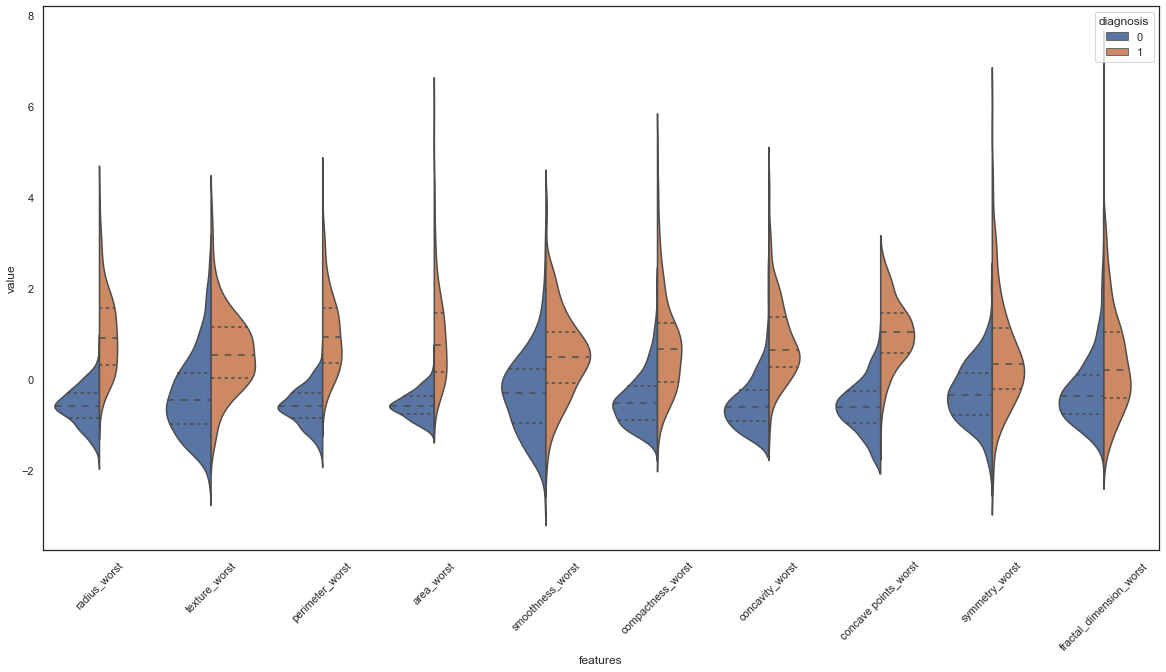

In [118]:
# Third ten features
data_vis = pd.concat([y_target, data_n.iloc[:,20:30]], axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))

sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True, 
               inner = "quart")

plt.xticks(rotation=45); # --matplotlib--

`Interpreting the above violin plot`: Concavity_worst & Concave points_worst look very similar. So how can we decide that are they co-related with each other or not, if they are co-related with each other then the best practice is to reduce the redundancy by dropping one of the columns.

### 3. Boxplot
To detect outliers

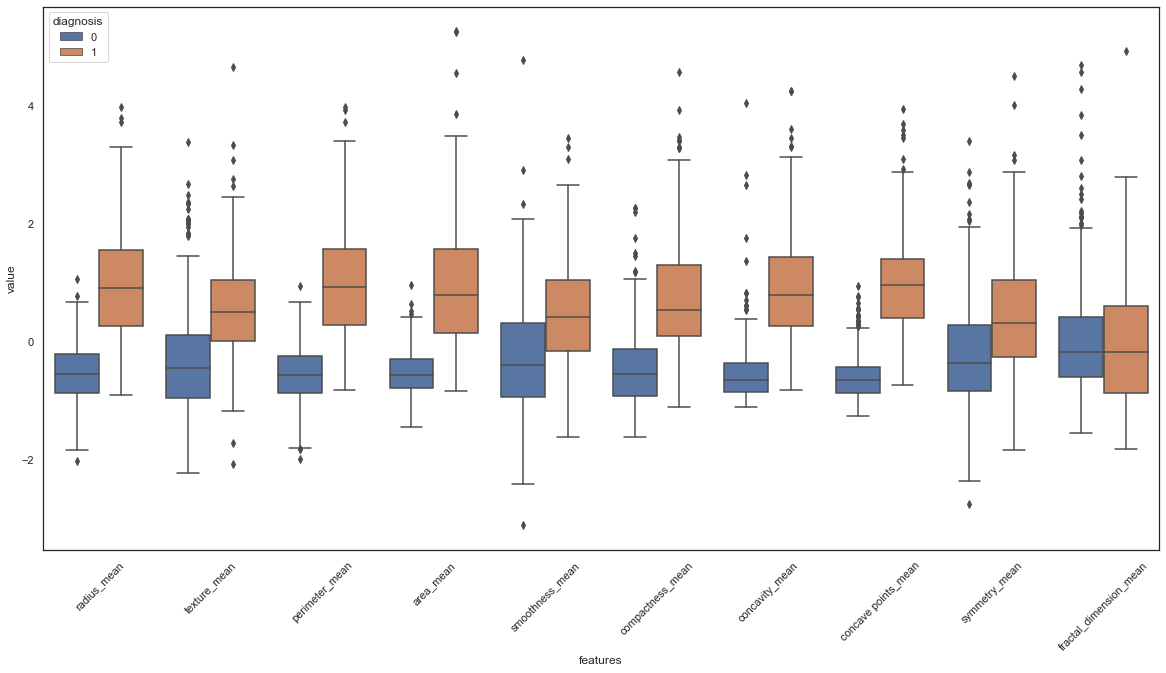

In [119]:
# first ten features
data_vis = pd.concat([y_target, data_n.iloc[:,0:10]], axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features",
            y="value",
            hue="diagnosis",
            data=data_vis)
plt.xticks(rotation=45);

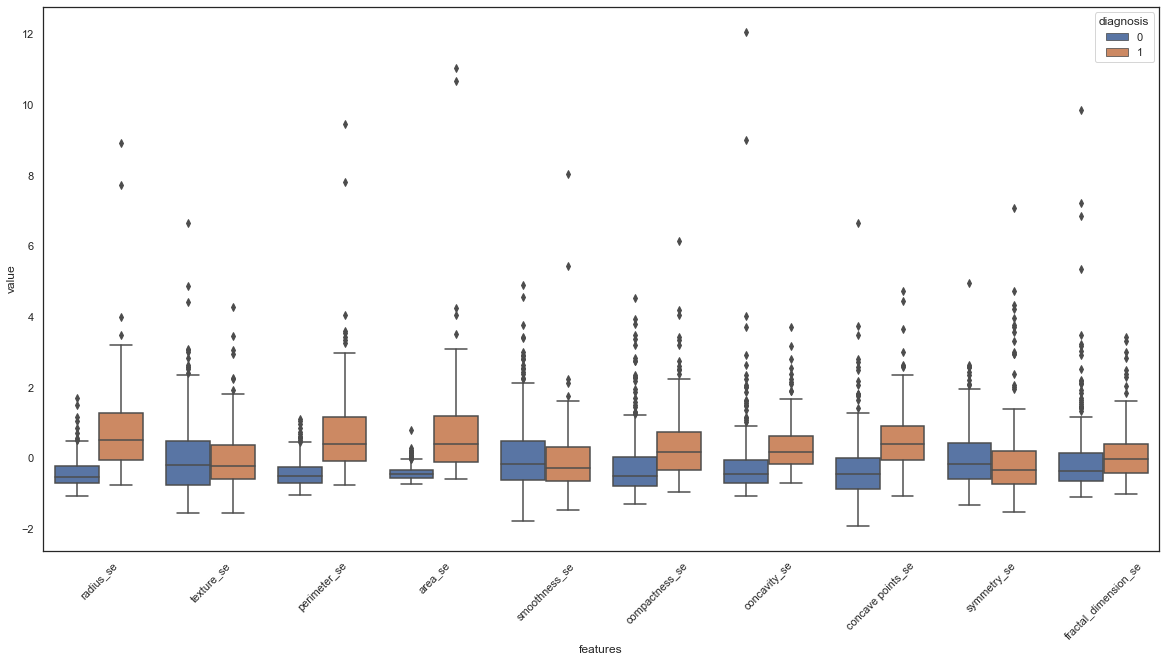

In [120]:
# second ten features
data_vis = pd.concat([y_target, data_n.iloc[:,10:20]], axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features",
            y="value",
            hue="diagnosis",
            data=data_vis)

plt.xticks(rotation=45);

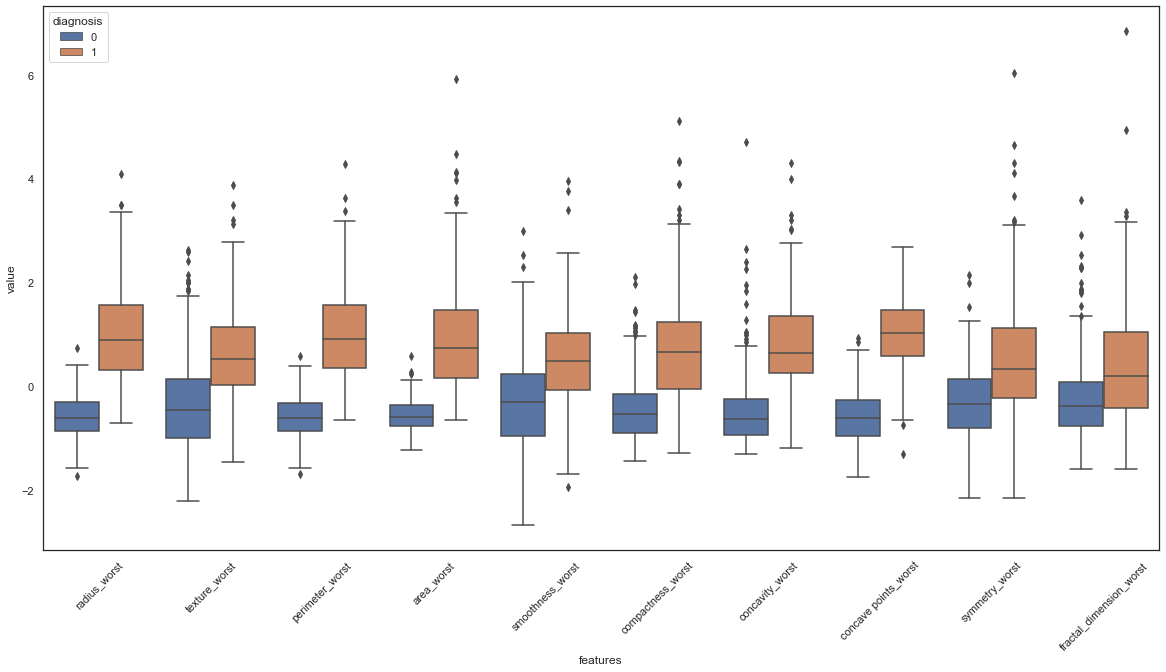

In [121]:
# third ten features
data_vis = pd.concat([y_target, data_n.iloc[:,20:30]], axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features",
            y="value",
            hue="diagnosis",
            data=data_vis)

plt.xticks(rotation=45);

### 4. Strip Plot

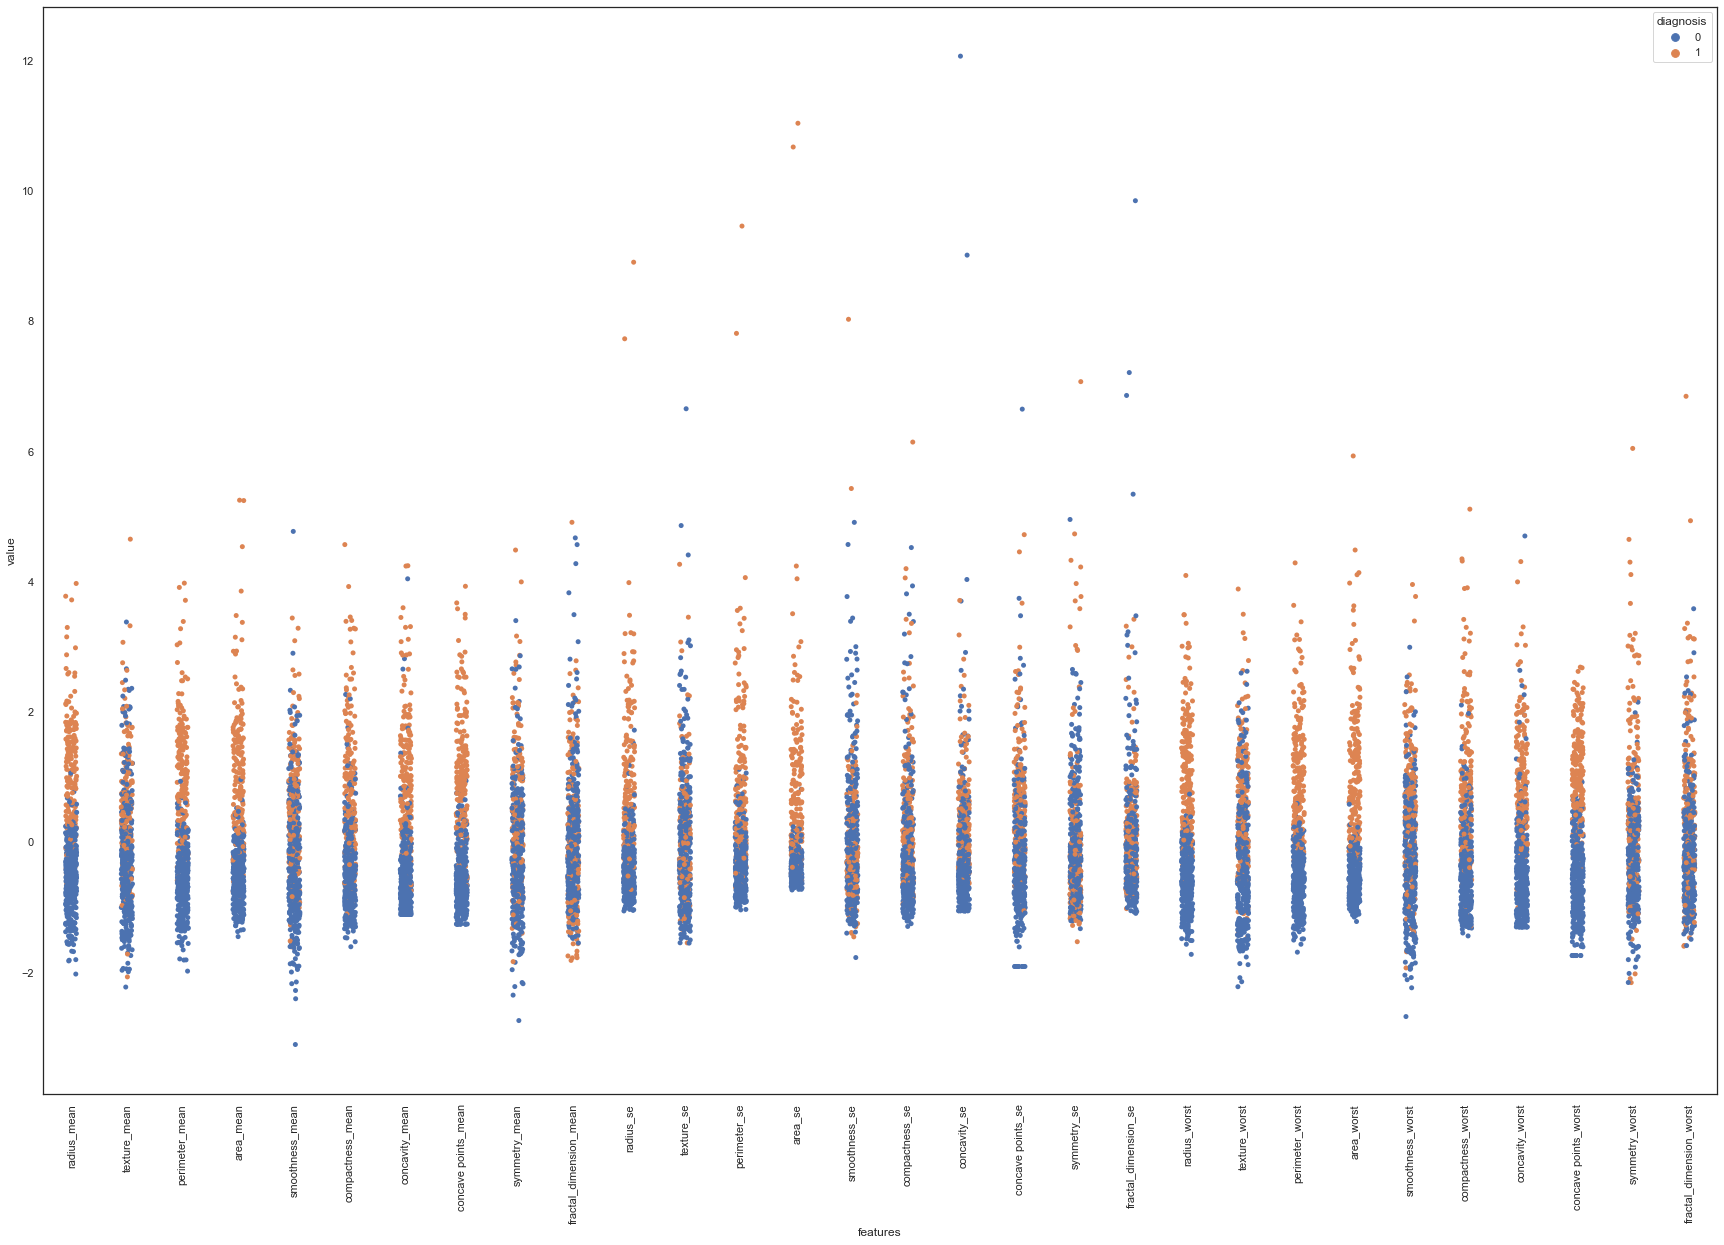

In [122]:
# Correlation of each feature and our target variable

data_vis = pd.concat([y_target, data_n.iloc[:,0:30]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(30,20))
sns.stripplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=90);

### 5. Joint Plots

C:\Users\vedas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



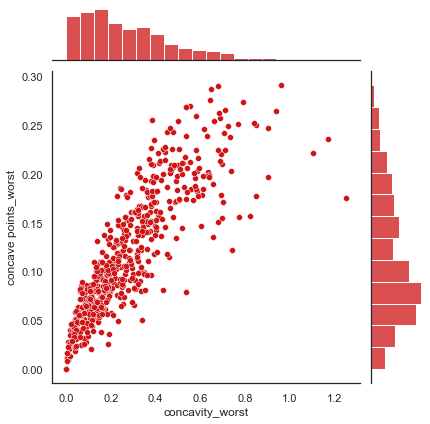

In [123]:
# Checking how co-related the two feature are
sns.jointplot(x_features.loc[:,'concavity_worst'],
              x_features.loc[:,'concave points_worst'],
              color="#ce1414");

The features look highly correlated.

C:\Users\vedas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



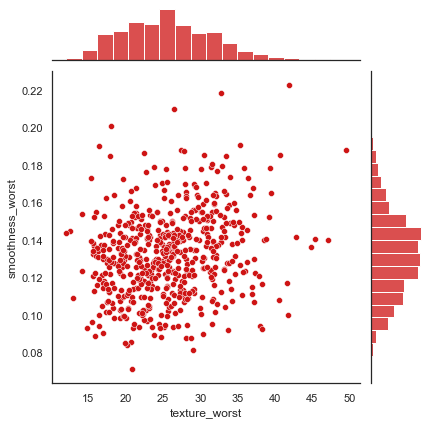

In [124]:
sns.jointplot(x_features.loc[:,'texture_worst'],
              x_features.loc[:,'smoothness_worst'],
              color="#ce1414");

The features dont show high correlation.

C:\Users\vedas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



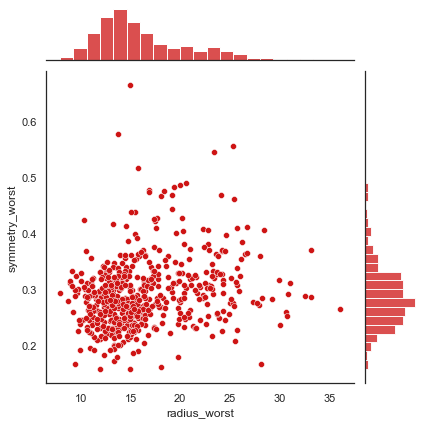

In [125]:
sns.jointplot(x_features.loc[:,'radius_worst'],
              x_features.loc[:,'symmetry_worst'],
              color="#ce1414");

The features dont show high correlation.

### 6. Pair grids of correlated features

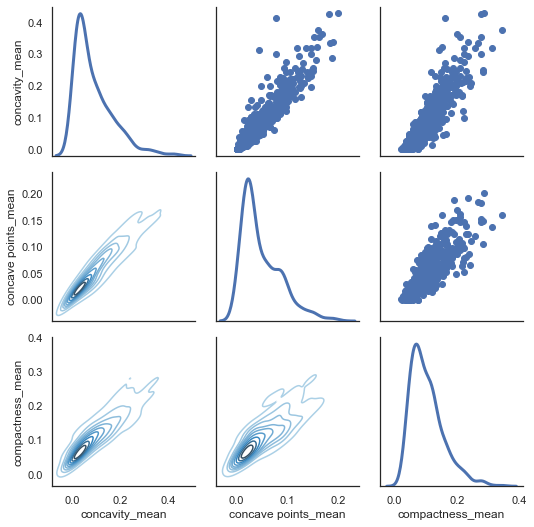

In [126]:
sns.set(style="white")
df = x_features.loc[:,['concavity_mean','concave points_mean','compactness_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

### 7. Heat Map

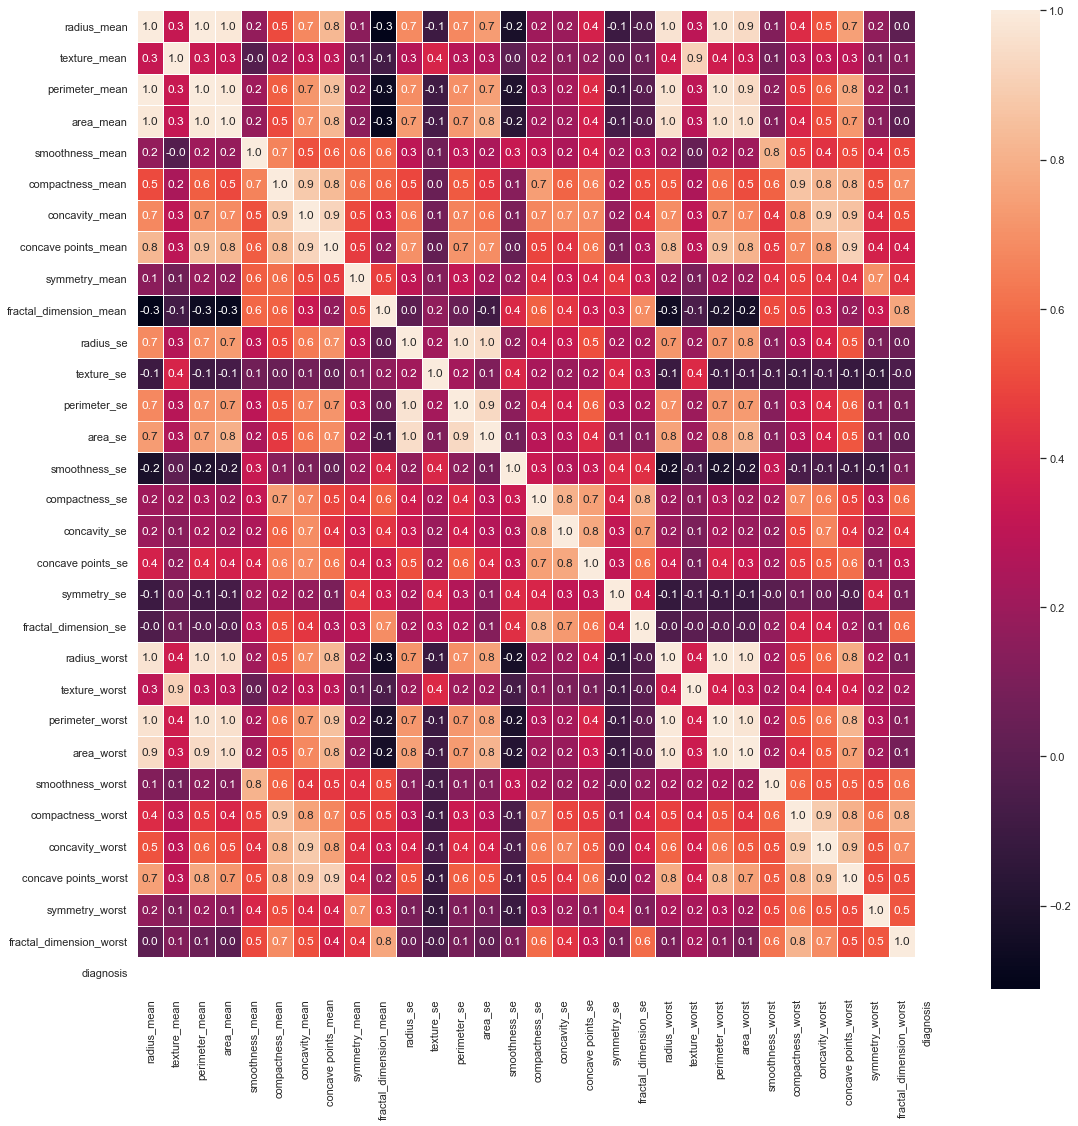

In [127]:
# Pair-wise correlation across all the varible
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Observations from the heatmap
1. radius_mean is highly correlated with perimeter_mean, area_mean. (radius, perimeter, area are highly correlated. Thus one feature among them can be considered and other two can be dropped)
2. concavity_se and concave_points_se also show comparatively high correlation. (One of them can be dropped)
3. radius_mean, perimeter_mean and area_mean are correlated as they have value 1 shown on the heatmap
4. Compactness_mean, concavity_mean and concave points_mean which have values 0.88 and 0.92 with respect to concavity_mean.
5. radius_se, perimeter_se and area_se are correlated as perimeter_se and area_se have values 0.97 and 0.98 with respect to radius_se.
6. radius_worst, perimeter_worst and area_worst are correlated as perimeter_worst and area_worst have values 0.98 and 0.99 with respect to radius_worst
7. Compactness_worst, concavity_worst and concave points_worst  seem correlated as the values of concavity_worst and concave points_worst are 0.89 and 0.86 respectively.



### C. Feature Selection
#### From correlated features found through heatmap:

1. From radius_mean, perimeter_mean and area_mean: radius_mean
2. From radius_se, perimeter_se and area_se: radius_se
3. From radius_worst, perimeter_worst and area_worst: area_worst
4. From concavity_mean, concave points_mean, compactness_mean: concave_points_mean
5. From concavity_worst, concave points_worst, compactness_worst: compactness_worst

*from 1,2,3: radius_mean & radius_se (0.7), radius_mean & area_worst (0.9), radius_se & area_worst (0.8).

*from 4 and 5, concave_points_mean and compactness_worst show the lowest correlation value (0.7) among the other possible combinations. 

#### Features having well separated median values:
1. Texture_mean
2. Smoothness_mean
3. Symmetry_mean
4. Texture_worst
5. Smoothness_worst
6. Symmetry_worst
7. Fractal_dimension_worst
8. Concavity_se
9. Compactness_se
10. concave_points_se

*concavity_se, compactness_se and concave points_se have correlation value 0.8 

#### Following features do not have well separated median values:
1. Fractal_dimension_mean
2. texture_se
3. smoothness_se
4. symmetry_se. 
*Thus these features might not prove very effective for classification.

*Features that fall in between well separated and not well separated median values:
Fractal_dimension_se




#### Miscellanoues Points:
1. Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.
2. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]
3. Feature Selection: Select a subset of input features from the dataset. Unsupervised: Do not use the target variable (e.g. remove redundant variables). Supervised: Use the target variable (e.g. remove irrelevant variables). Wrapper: Search for well-performing subsets of features.